In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc

In [2]:
adata = sc.read_h5ad("scanpy/iGlut_post_dr_clustered_raw_merged.h5ad")

In [3]:
adata.obs.columns

Index(['sample', 'species', 'gene_count', 'tscp_count', 'mread_count',
       'bc1_well', 'bc2_well', 'bc3_well', 'bc1_wind', 'bc2_wind', 'bc3_wind',
       'plateID', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes',
       'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt',
       'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo',
       'n_genes', 'percent_mito', 'n_counts', 'outlier', 'mt_outlier',
       'doublet_score', 'predicted_doublet', 'leiden_4', 'leiden_10',
       'merged_clusters', 'final_clustering', 'final_clustering_reset',
       'merged_clusters_from_10'],
      dtype='object')

In [4]:
parse_exp = pd.read_csv("adata/Parse_samples_all.csv",index_col=0)

In [5]:
plateID_dict = {'iGlut_post_p1':'p1',
                'iGlut_post_p2':'p2',
                'iGlut_pre':'p3',
                'iGABA_post':'p4',
                'iGABA_pre':'p5'}

In [6]:
meta = adata.obs.copy()

In [10]:
meta['plateID'] = meta['plateID'].astype('str')

In [14]:
for sample in set(meta['sample']):
    meta.loc[meta['sample']==sample,'plateID'] = plateID_dict[sample]

In [15]:
meta['parse_id'] = meta['plateID'].astype('str')+'_'+meta['bc1_well'].astype('str')

In [16]:
meta['AP_axis'] = list(parse_exp.loc[meta['parse_id'],'AP_axis'])
meta['DV_axis'] = list(parse_exp.loc[meta['parse_id'],'DV_axis'])
meta['Basal_media'] = list(parse_exp.loc[meta['parse_id'],'Basal_media'])


In [17]:
meta.drop('merged_clusters',axis=1,inplace=True)
meta.drop('final_clustering',axis=1,inplace=True)
meta.drop('final_clustering_reset',axis=1,inplace=True)
meta['final_clustering'] = meta['merged_clusters_from_10']

In [18]:
meta_select = meta.copy()

In [19]:
morphogens = ['XAV','CHIR','RA','FGF8','BMP4','SHH','PM']
for x in morphogens:
    meta_select[x] = 0
    
meta_select.loc[meta_select['AP_axis']=='CHIR_1','CHIR'] = 0.2 #uM
meta_select.loc[meta_select['AP_axis']=='CHIR_2','CHIR'] = 0.7
meta_select.loc[meta_select['AP_axis']=='CHIR_3','CHIR'] = 1.5
meta_select.loc[meta_select['AP_axis']=='CHIR_4','CHIR'] = 3

meta_select.loc[meta_select['AP_axis']=='FGF8_1','FGF8'] = 10 #ng/mL
meta_select.loc[meta_select['AP_axis']=='FGF8_2','FGF8'] = 50
meta_select.loc[meta_select['AP_axis']=='FGF8_3','FGF8'] = 100
meta_select.loc[meta_select['AP_axis']=='FGF8_4','FGF8'] = 250

meta_select.loc[meta_select['AP_axis']=='RA_1','RA'] = 1 #nM
meta_select.loc[meta_select['AP_axis']=='RA_2','RA'] = 10
meta_select.loc[meta_select['AP_axis']=='RA_3','RA'] = 100
meta_select.loc[meta_select['AP_axis']=='RA_4','RA'] = 1000

meta_select.loc[meta_select['AP_axis']=='XAV_1','XAV'] = 0.2 #uM
meta_select.loc[meta_select['AP_axis']=='XAV_2','XAV'] = 1
meta_select.loc[meta_select['AP_axis']=='XAV_3','XAV'] = 5

meta_select.loc[meta_select['AP_axis']=='FGF8_1_CHIR','FGF8'] = 10 #ng/mL
meta_select.loc[meta_select['AP_axis']=='FGF8_2_CHIR','FGF8'] = 50
meta_select.loc[meta_select['AP_axis']=='FGF8_3_CHIR','FGF8'] = 100
meta_select.loc[meta_select['AP_axis']=='FGF8_4_CHIR','FGF8'] = 250

meta_select.loc[meta_select['AP_axis']=='RA_1_CHIR','RA'] = 1 #nM
meta_select.loc[meta_select['AP_axis']=='RA_2_CHIR','RA'] = 10
meta_select.loc[meta_select['AP_axis']=='RA_3_CHIR','RA'] = 100
meta_select.loc[meta_select['AP_axis']=='RA_4_CHIR','RA'] = 1000

meta_select.loc[meta_select['AP_axis'].isin(['FGF8_1_CHIR','FGF8_2_CHIR','FGF8_3_CHIR','FGF8_4_CHIR',
                                             'RA_1_CHIR','RA_2_CHIR','RA_3_CHIR','RA_4_CHIR']), 'CHIR'] = 3 #uM


meta_select.loc[meta_select['DV_axis']=='BMP4_1','BMP4'] = 5 #ng/mL
meta_select.loc[meta_select['DV_axis']=='BMP4_2','BMP4'] = 15
meta_select.loc[meta_select['DV_axis']=='BMP4_3','BMP4'] = 50

meta_select.loc[meta_select['DV_axis']=='SHH_1','SHH'] = 15 #ng/mL
meta_select.loc[meta_select['DV_axis']=='SHH_2','SHH'] = 50
meta_select.loc[meta_select['DV_axis']=='SHH_3','SHH'] = 150
meta_select.loc[meta_select['DV_axis']=='SHH_4','SHH'] = 500

meta_select['CycA'] = 0
meta_select.loc[meta_select['DV_axis']=='CycA','CycA'] = 1 #binary

#prepatterning specific
meta_select.loc[meta_select['AP_axis']=='CHIR_2_FGF8','CHIR'] = 0.7
meta_select.loc[meta_select['AP_axis']=='RA_3_FGF8','RA'] = 100
meta_select.loc[meta_select['AP_axis']=='XAV_3_FGF8','XAV'] = 5
meta_select.loc[meta_select['AP_axis'].isin(['FGF8','CHIR_2_FGF8','RA_3_FGF8','XAV_3_FGF8']),'FGF8'] = 100 #prepatterning

for x in morphogens:
    meta_select['M_'+x] = meta_select[x]
    meta_select.drop(x,axis=1,inplace=True)

meta = meta_select.copy()

In [20]:
meta['Basal_media'].value_counts()

mTeSR    184431
Name: Basal_media, dtype: int64

In [21]:
adata.obs = meta

/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


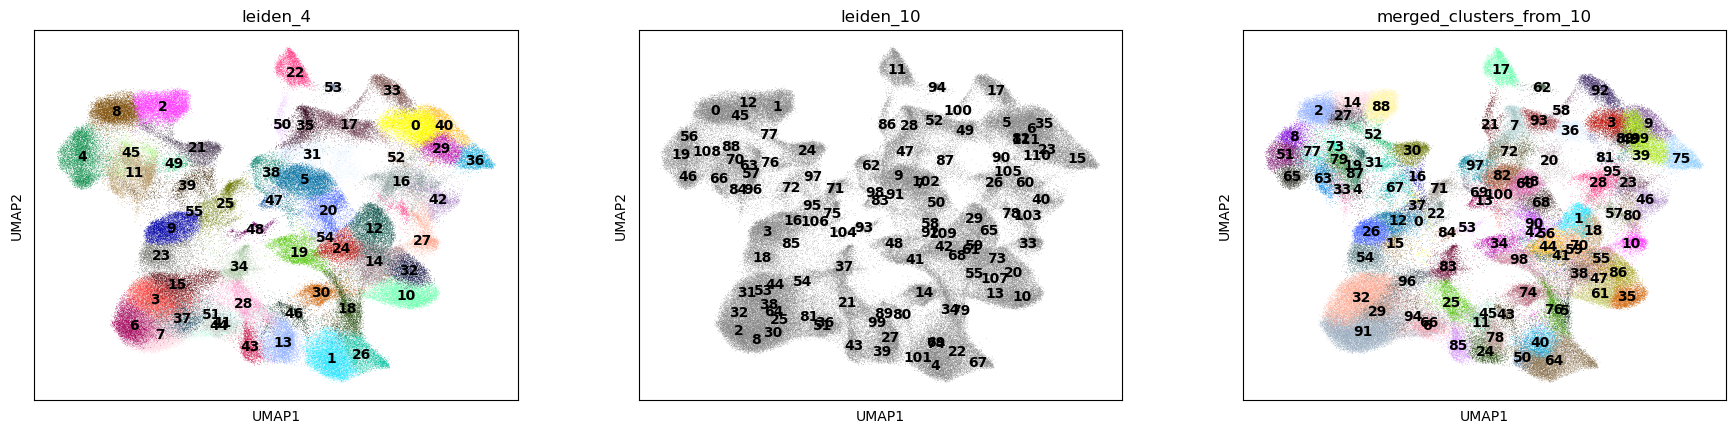

In [22]:
sc.pl.umap(adata,color=['leiden_4','leiden_10','merged_clusters_from_10'],legend_loc='on data')
plt.show()
plt.close()

In [23]:
adata

AnnData object with n_obs × n_vars = 184431 × 62710
    obs: 'sample', 'species', 'gene_count', 'tscp_count', 'mread_count', 'bc1_well', 'bc2_well', 'bc3_well', 'bc1_wind', 'bc2_wind', 'bc3_wind', 'plateID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'percent_mito', 'n_counts', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'leiden_4', 'leiden_10', 'merged_clusters_from_10', 'parse_id', 'AP_axis', 'DV_axis', 'Basal_media', 'final_clustering', 'CycA', 'M_XAV', 'M_CHIR', 'M_RA', 'M_FGF8', 'M_BMP4', 'M_SHH', 'M_PM'
    uns: 'leiden_4_colors', 'leiden_10_colors', 'merged_clusters_from_10_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [24]:
tsne_dr = pd.DataFrame(adata.obsm['X_tsne'],index=adata.obs.index,columns=['tSNE_1','tSNE_2'])
umap_dr = pd.DataFrame(adata.obsm['X_umap'],index=adata.obs.index,columns=['umap_1','umap_2'])

In [25]:
meta = pd.merge(meta,tsne_dr,left_index=True,right_index=True)
meta = pd.merge(meta,umap_dr,left_index=True,right_index=True)

In [29]:
meta.to_csv("scanpy/iGlut_post_dr_clustered_raw_merged_meta.tsv",sep="\t")

In [30]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [31]:
sc.tl.rank_genes_groups(adata, 'final_clustering', method='wilcoxon',key_added='final_clustering-markers')


/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/links/groups/treutlein/USERS/jjans/a

In [32]:
markers_name = 'final_clustering-markers'
names = pd.DataFrame(adata.uns[markers_name]['names'])
scores = pd.DataFrame(adata.uns[markers_name]['scores'])
pvals = pd.DataFrame(adata.uns[markers_name]['pvals'])
pvals_adj = pd.DataFrame(adata.uns[markers_name]['pvals_adj'])
logfoldchanges = pd.DataFrame(adata.uns[markers_name]['logfoldchanges'])

i = 0
for x in names.columns:
    genes_index = names[x]
    tmp = pd.DataFrame(index=genes_index)
    tmp['scores'] = np.array(scores[x])
    tmp['pvals'] = np.array(pvals[x])
    tmp['pvals_adj'] = np.array(pvals_adj[x])
    tmp['logfoldchanges'] = np.array(logfoldchanges[x])
    tmp['cluster'] = x
    if i == 0 :
        results_all = tmp
        i+=1
    else:
        results_all = pd.concat([results_all,tmp])
        


In [33]:
results_all.to_csv("marker_genes/iGlut_post_dr_clustered_raw_merged_markers.tsv",sep="\t")

